In [1]:
# In this chapter, we will construct basically the same Neural Network as in the first chapter, so if any
# questions arise, check it out. As I said, this will practically be the same structure as in Chapter 1, 
# only this time, we will feed in vectors and want to have single numbers as output in our first algorithm
# and a vector of numbers as output in our second.

In [2]:
import numpy as np
from random import *

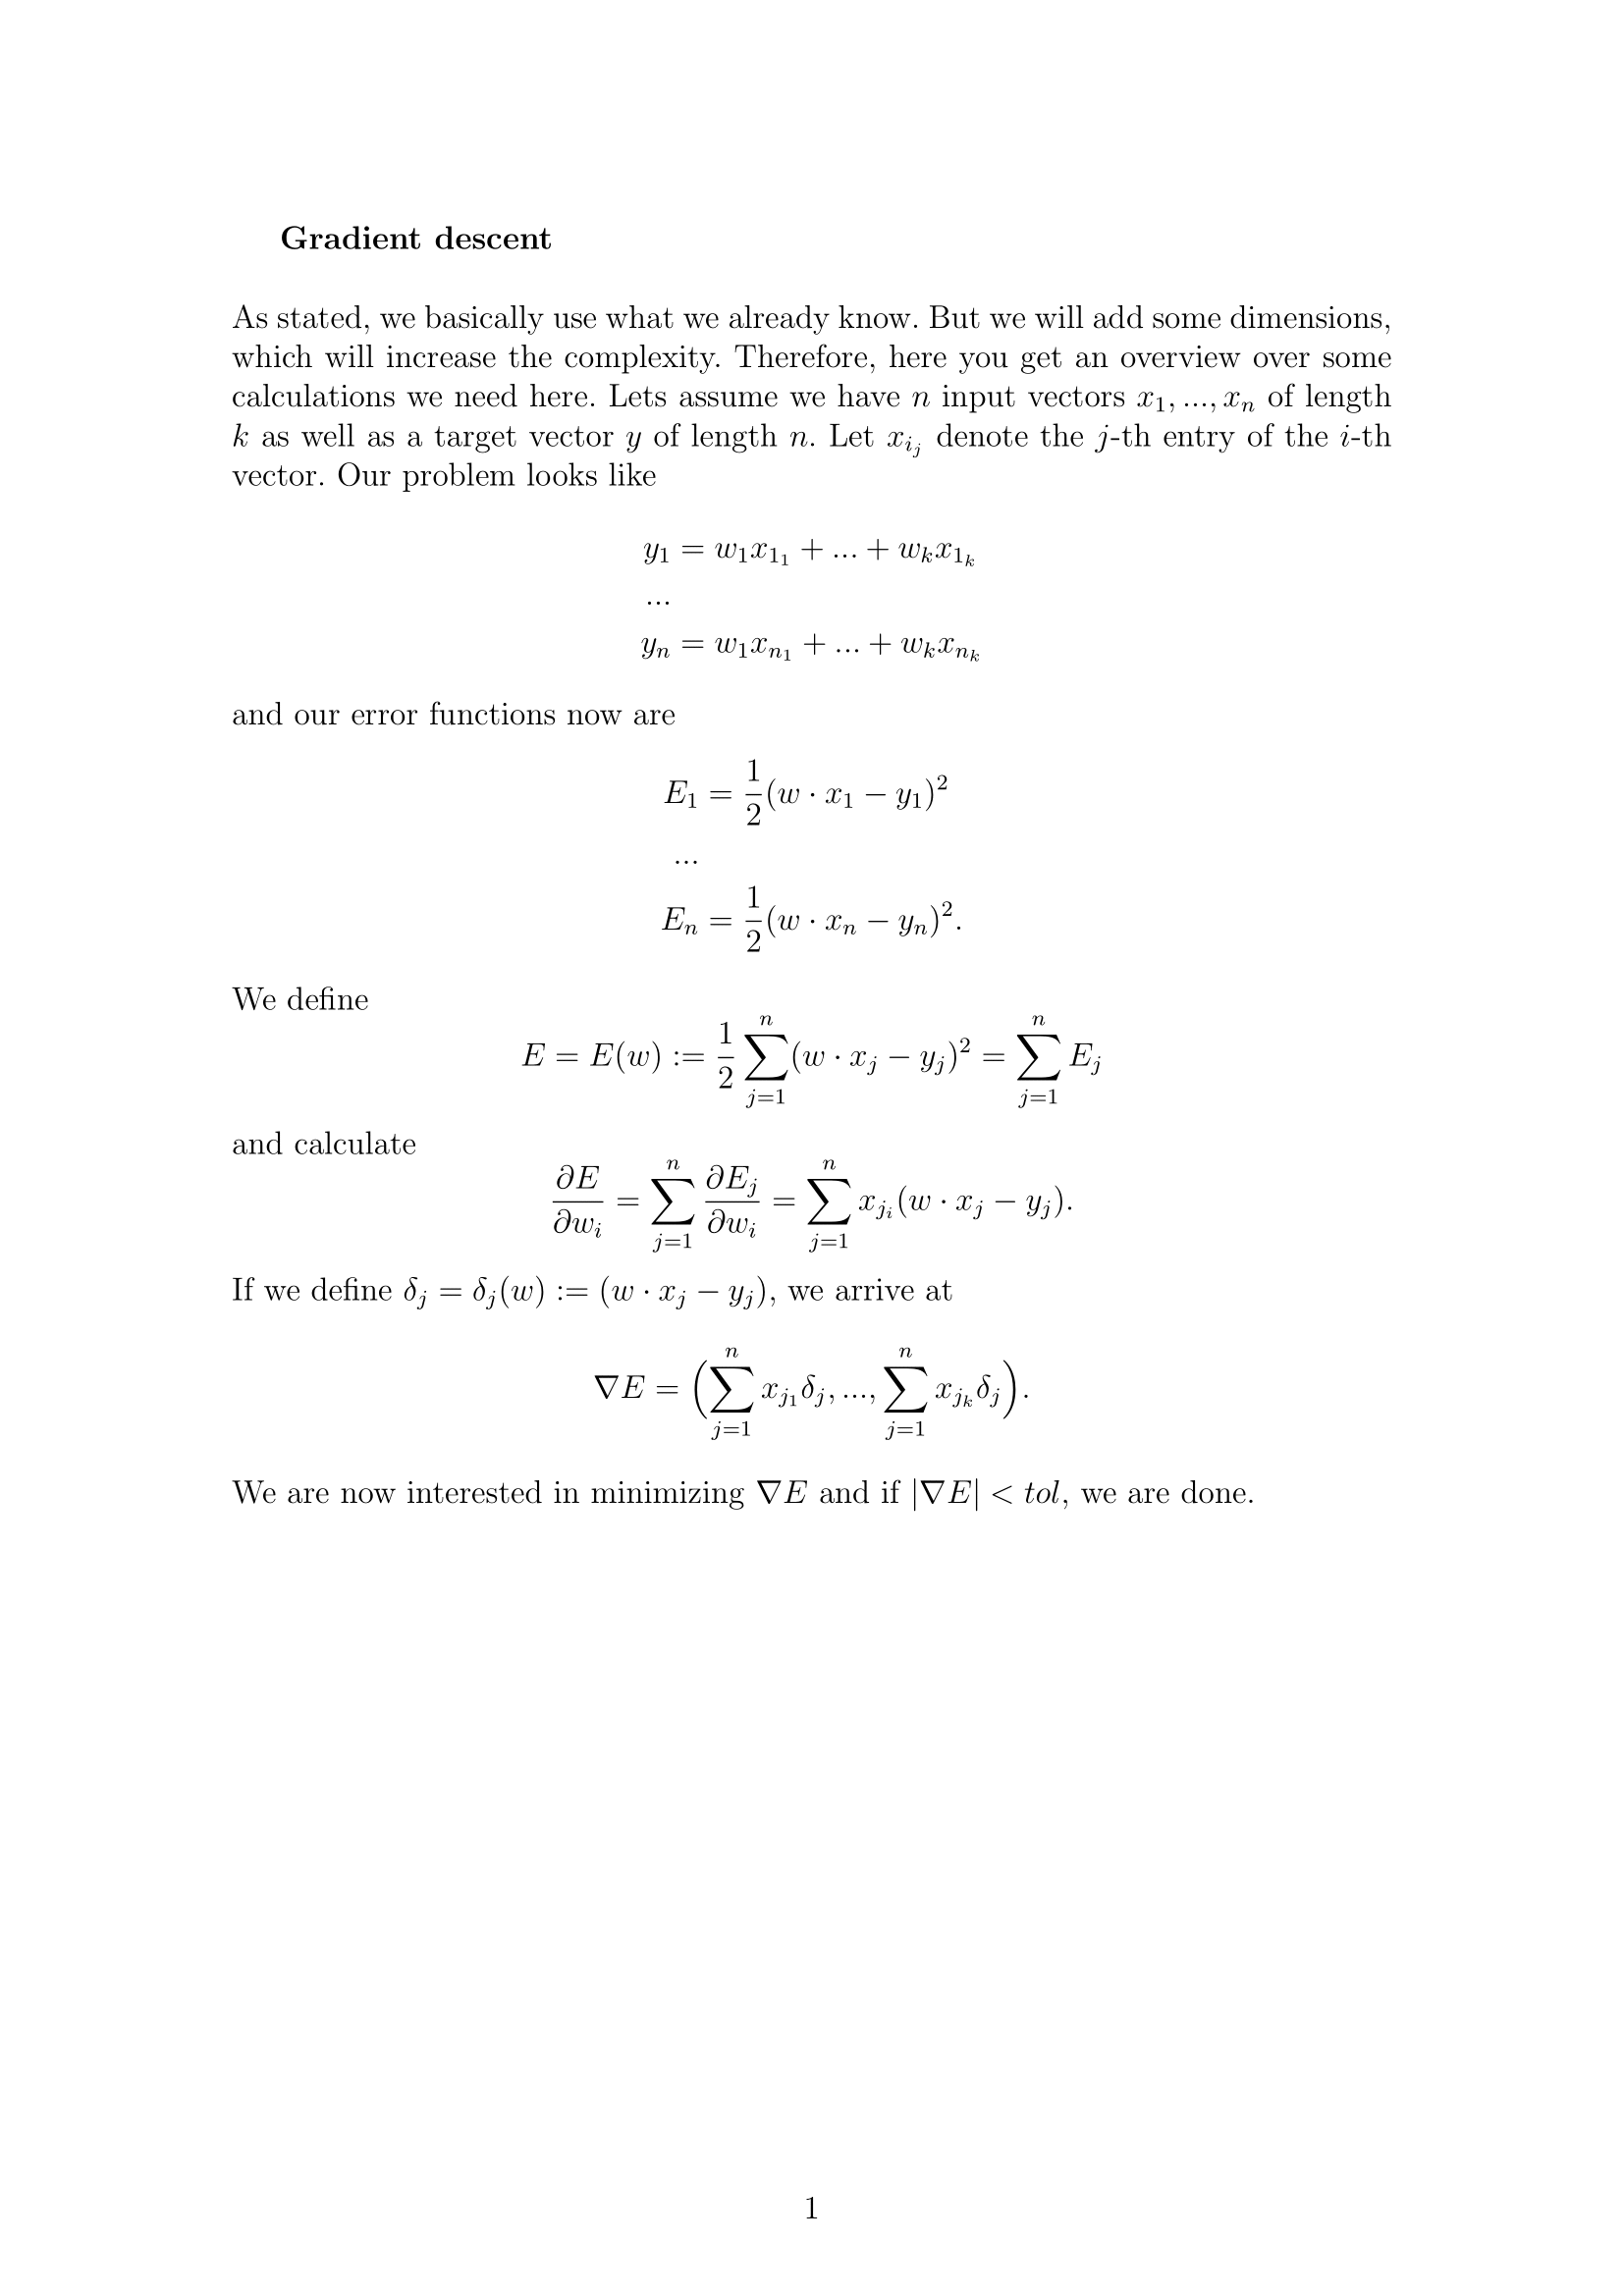

In [3]:
# We will introduce the same, but more complex mathematics at first:
from IPython.display import display
from PIL import Image
img_PIL = Image.open(r'C:\\Users\\User\\Neural Networks\Math explanations\\Chapter 2 Simple NN vectorized.png')
display(img_PIL)

# K to 1

In [4]:
# This is a many-to-one-algorithm.
class simpleNN_K_to_1:
    
    def fit(x_train, y_train, learning_rate, tol):
        
        # Here, we want the association y = w1*x1 + w2*x2 + ...
        
        # Produce a vector of random numbers between 0 and 1
        w = []
        for k in range(len(x_train)):
            w.append(random())
            
        w = np.array(w)
        k = 0
        learning = True
        
        while learning:
            
            y_pred = np.dot(x_train, w) 
            delta = y_pred - y_train
            w_diff = - learning_rate * delta * x_train
            w = w + w_diff
            d = np.sqrt(np.dot(delta*x_train, delta*x_train)) # calculating the vector length 
    
            if d < tol: learning = False
                
        simpleNN_K_to_1.weights = w
    
    def predict(x_pred):
        return np.dot(simpleNN_K_to_1.weights, x_pred)

In [5]:
simpleNN_K_to_1.fit(np.array([20, 17.3]), 5, 0.001, 0.001)

In [6]:
simpleNN_K_to_1.predict(np.array([20, 17.3]))

5.000005371607891

In [7]:
simpleNN_K_to_1.weights

array([-0.0504366 ,  0.34732587])

# N*K to N

In [8]:
class simpleNN_NK_to_N:
    # This network will fit n input vectors of length k to a vector of length n. Because we have n input vectors,
    # we need to be able to choose the i-th of those, which is why we will need x_train as a 2D array.
    def fit(x_train, y_train, learning_rate, tol):
        
        L_x0 = x_train.shape[0] # = amount of vectors = len(y_train) = n
        L_x1 = x_train.shape[1] # = amount of entries inside a vector = k
        # Our problem here looks like this:
        # y1 = w1*x11 + w2*x12 + ...
        # y2 = x1*x21 + w2*x22 + ...
        # ...
        
        # Produce a vector of random numbers between 0 and 1
        w = []
        for n in range(L_x1):
            w.append(random())          
        w = np.array(w)
        
        learning = True
        # Concerning the gradient here, let E_i (i = 1, ..., n) denote the i-th error function, 
        # y_i the i-th label and x_i the i-th input vector:
        # E_i := 1/2 (np.dot(w, x_i) - y_i)^2
        # E := sum_{i=1}^n 1/2 (np.dot(w, x_i) - y_i)^2 = sum_{i=1}^n E_i
        # grad(E_i) = ( (np.dot(w, x_i) - y_i)*x_1i, ..., (np.dot(w,x_i) - y_i)*x_ni )
        #           = (np.dot(w,x_i) - y_i) * x_i 
        # where x_ji denotes the j-th entry of the i-th vector.
        # In the following we are interested in minimizing grad(E). 
        while learning: 
            # We append values to delta in order to calculate grad(E)
            delta = []
            for k in range(L_x0): 
                delta.append( np.dot(x_train[k], w)  - y_train[k] )
            delta = np.array(delta)
            
            # Calculate grad(E) now. Initiate a vector of zeros so that we can overwrite this easily
            # by summing up the partial derivatives d(E_k)/dw_j = delta_k * x_jk. Here, x_jk
            # denotes the k-th vector and its j-th entry. Vectorized this would be more efficient,
            # but like this, we can see better what is happening using the calculations above.
            grad_E = np.zeros(L_x1)
            for i in range(L_x1):
                for j in range(len(delta)):
                    # In x_train taking the j-th vector and the i-th entry in that
                    grad_E[i] += delta[j]*x_train[j][i] 
                    
            w_diff = - learning_rate * grad_E
            w = w + w_diff
                 
            d = np.sqrt(np.dot(grad_E, grad_E)) # calculating the vector length     
            if d < tol: learning = False
        
        simpleNN_NK_to_N.weights = w
    
    def predict(x_pred):
        preds = []
        for k in range(x_pred.shape[0]):
            preds.append(np.dot(simpleNN_NK_to_N.weights, x_pred[k]))
        return preds

In [9]:
simpleNN_NK_to_N.fit(np.array([[8, 2, 11, -0.3, 7], [17, 3, 12, 3, -100], [0, 0, 0, -2.3, 1]]), np.array([20, -5, 0.7]), 0.0001, 0.0001)

In [10]:
simpleNN_NK_to_N.predict(np.array([[8, 2, 11, -0.3, 7], [17, 3, 12, 3, -100], [0, 0, 0, -2.3, 1]]))

[20.000000678845772, -5.000000423023232, 0.6999559528658923]

In [11]:
simpleNN_NK_to_N.weights

array([ 0.79143138,  0.78526903,  0.8974722 , -0.16923255,  0.3107211 ])

In [12]:
# Again, be aware of the learning rate. Switching the comma by just one gets us an overflow:
simpleNN_NK_to_N.fit(np.array([[8, 2, 11, -0.3, 7], [17, 3, 12, 3, -100], [0, 0, 0, -2.3, 1]]), np.array([20, -5, 0.7]), 0.001, 0.0001)

<ipython-input-8-fadc455adc61>:43: RuntimeWarning: overflow encountered in double_scalars
  grad_E[i] += delta[j]*x_train[j][i]
<ipython-input-8-fadc455adc61>:43: RuntimeWarning: invalid value encountered in double_scalars
  grad_E[i] += delta[j]*x_train[j][i]
<ipython-input-8-fadc455adc61>:46: RuntimeWarning: invalid value encountered in add
  w = w + w_diff


KeyboardInterrupt: 